# HW 5 part 1

Import what is needed here (first read what follows)

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from numpy.random import default_rng
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import scipy
import matplotlib.pyplot as plt

Set `gen = np.random.default_rng(seed)`, with the seed assigned to you.

In [2]:
gen = np.random.default_rng(739)

Simulate `n_rep=500` samples of `n_obs=100` observations from a AR(1) process 

$$ z_t = \alpha_0 + \alpha_1 z_{t-1} + \varepsilon_t$$

where $\alpha_0=1$, $\alpha_1=.5$ and the variance of $\varepsilon_t$ is $\sigma^2 = 1.5$

In [3]:
alpha_0=1
alpha_1=0.5
sigma_sq=1.5

ar_param = np.array([alpha_1])
ma_param = np.array([0])
ar = np.r_[1, -alpha_1]
ma = np.r_[1, 0]
ar1_process = ArmaProcess(ar, ma)

n_obs = 100
n_rep=500
data = ar1_process.generate_sample(nsample = (n_obs, n_rep),  burnin=1000,  scale=sigma_sq, distrvs=gen.normal)
ones = np.full((n_obs,n_rep),alpha_0)
data = data + ones

Estimate the correct model specification using OLS and MLE for each one of the `n_rep` samples and save the parameter estimates from each method in two `n_rep` $\times 3 $ arrays, called `thetaOLS` (for OLS) and `thetaMLE` (for MLE)

__Hint:__ Probably want to use a for loop...

In [4]:
#Estimation method - OLS
thetaOLS = np.empty((0, 3))
thetaOLS_resid = np.array([])

for x in range(0, 500):
    AR_OLS_model = AutoReg(data[:,x], trend='c', lags=1)
    AR_OLS_results=AR_OLS_model.fit()
    thetaOLS=np.append(thetaOLS, [[AR_OLS_results.params[0], AR_OLS_results.params[1], AR_OLS_results.resid.std()]], axis=0)
    thetaOLS_resid=np.append(thetaOLS_resid, AR_OLS_results.resid, axis=0)
    
#Estimation method - MLE  
thetaMLE = np.empty((0, 3))
thetaMLE_resid = np.array([])

for x in range(0, 500):
    AR_MLE_model = ARIMA(data[:,x], trend='c', order=(1, 0, 0))
    AR_MLE_results=AR_MLE_model.fit()
    thetaMLE=np.append(thetaMLE, [[AR_MLE_results.params[0], AR_MLE_results.params[1], AR_MLE_results.resid.std()]], axis=0)
    thetaMLE_resid=np.append(thetaMLE_resid, AR_MLE_results.resid, axis=0)

Print the means and standard deviations of the parameter estimates

In [5]:
#OLS
OLS_alpha0_mean=np.mean(thetaOLS[:,0]).round(3)
OLS_alpha1_mean=np.mean(thetaOLS[:,1]).round(3)
OLS_sigmasq_mean=np.mean(thetaOLS[:,2]).round(3)

OLS_alpha0_std=np.std(thetaOLS[:,0]).round(3)
OLS_alpha1_std=np.std(thetaOLS[:,1]).round(3)
OLS_sigmasq_std=np.std(thetaOLS[:,2]).round(3)

#OLS
MLE_alpha0_mean=np.mean(thetaMLE[:,0]).round(3)
MLE_alpha1_mean=np.mean(thetaMLE[:,1]).round(3)
MLE_sigmasq_mean=np.mean(thetaMLE[:,2]).round(3)

MLE_alpha0_std=np.std(thetaMLE[:,0]).round(3)
MLE_alpha1_std=np.std(thetaMLE[:,1]).round(3)
MLE_sigmasq_std=np.std(thetaMLE[:,2]).round(3)

print(f"Regarding the alpha 0 estimates, the mean is {OLS_alpha0_mean}, in the OLS, and {MLE_alpha0_mean}, in the MLE. The standard deviation is {OLS_alpha0_std}, in the OLS, and {MLE_alpha0_std}, in the MLE.")
print(f"Regarding the alpha 1 estimates, the mean is {OLS_alpha1_mean}, in the OLS, and {MLE_alpha1_mean}, in the MLE. The standard deviation is {OLS_alpha1_std}, in the OLS, and {MLE_alpha1_std}, in the MLE.")
print(f"Regarding sigma square estimates, the mean is {OLS_sigmasq_mean}, in the OLS, and {MLE_sigmasq_mean}, in the MLE.The standard deviation is {OLS_sigmasq_std}, in the OLS, and {MLE_sigmasq_std}, in the MLE.")

Regarding the alpha 0 estimates, the mean is 0.545, in the OLS, and 1.04, in the MLE. The standard deviation is 0.199, in the OLS, and 0.316, in the MLE.
Regarding the alpha 1 estimates, the mean is 0.476, in the OLS, and 0.476, in the MLE. The standard deviation is 0.091, in the OLS, and 0.091, in the MLE.
Regarding sigma square estimates, the mean is 1.474, in the OLS, and 1.477, in the MLE.The standard deviation is 0.106, in the OLS, and 0.105, in the MLE.


Compute and print the biases and mean squared errors of the parameter estimates

In [6]:
#BIASES

OLS_alpha0_bias=(np.subtract(alpha_0,thetaOLS[:,0]).mean()).round(3)
OLS_alpha1_bias=(np.subtract(alpha_1,thetaOLS[:,1]).mean()).round(3)
OLS_sigmasq_bias=(np.subtract(sigma_sq,thetaOLS[:,2]).mean()).round(3)

MLE_alpha0_bias=(np.subtract(alpha_0,thetaMLE[:,0]).mean()).round(3)
MLE_alpha1_bias=(np.subtract(alpha_1,thetaMLE[:,1]).mean()).round(3)
MLE_sigmasq_bias=(np.subtract(sigma_sq,thetaMLE[:,2]).mean()).round(3)

print(f"Regarding alpha0, the bias is {OLS_alpha0_bias}, in the OLS, and {MLE_alpha0_bias}, in the MLE.")
print(f"Regarding alpha1, the bias is {OLS_alpha1_bias}, in the OLS, and {MLE_alpha1_bias}, in the MLE.")
print(f"Regarding sigma square, the bias is {OLS_sigmasq_bias}, in the OLS, and {MLE_sigmasq_bias}, in the MLE.")

#Mean squared errors
OLS_alpha0_mse=(np.square(np.subtract(alpha_0,thetaOLS[:,0]))).mean().round(3)
OLS_alpha1_mse=(np.square(np.subtract(alpha_1,thetaOLS[:,1]))).mean().round(3)
OLS_sigmasq_mse=(np.square(np.subtract(sigma_sq,thetaOLS[:,2]))).mean().round(3)

MLE_alpha0_mse=(np.square(np.subtract(alpha_0,thetaMLE[:,0]))).mean().round(3)
MLE_alpha1_mse=(np.square(np.subtract(alpha_1,thetaMLE[:,1]))).mean().round(3)
MLE_sigmasq_mse=(np.square(np.subtract(sigma_sq,thetaMLE[:,2]))).mean().round(3)

print(f"Regarding alpha0, the  mean square errors are {OLS_alpha0_mse}, in the OLS, and {MLE_alpha0_mse}, in the MLE.")
print(f"Regarding alpha1, the  mean square errors are {OLS_alpha1_mse}, in the OLS, and {MLE_alpha1_mse}, in the MLE.")
print(f"Regarding sigma square, the  mean square errors are {OLS_sigmasq_mse}, in the OLS, and {MLE_sigmasq_mse}, in the MLE.")

Regarding alpha0, the bias is 0.455, in the OLS, and -0.04, in the MLE.
Regarding alpha1, the bias is 0.024, in the OLS, and 0.024, in the MLE.
Regarding sigma square, the bias is 0.026, in the OLS, and 0.023, in the MLE.
Regarding alpha0, the  mean square errors are 0.246, in the OLS, and 0.101, in the MLE.
Regarding alpha1, the  mean square errors are 0.009, in the OLS, and 0.009, in the MLE.
Regarding sigma square, the  mean square errors are 0.012, in the OLS, and 0.011, in the MLE.


Plot in a 2x3 figure the histograms of the parameter estimates, with OLS on the top row and MLE in the bottom

Text(0.5, 1.0, 'MLE - Estimation of sigma')

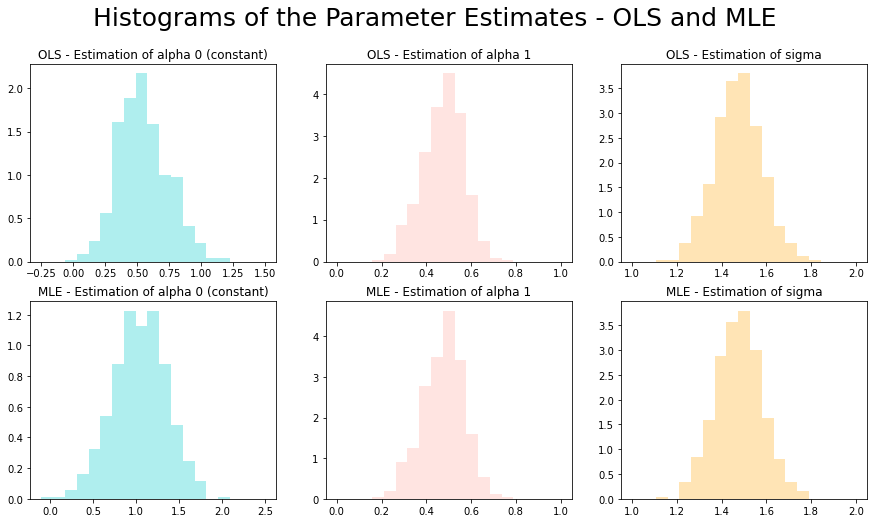

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(15,8))
fig.suptitle('Histograms of the Parameter Estimates - OLS and MLE', fontsize=25, fontweight=15)

x = np.linspace(-0.25,1.5, num=20)
axs[0, 0].hist(thetaOLS[:,0], bins=x, density=True, color='paleturquoise')
axs[0, 0].set_title('OLS - Estimation of alpha 0 (constant)')

x = np.linspace(0,1, num=20)
axs[0, 1].hist(thetaOLS[:,1], bins=x, density=True, color='mistyrose')
axs[0, 1].set_title('OLS - Estimation of alpha 1')

x = np.linspace(1,2, num=20)
axs[0, 2].hist(thetaOLS[:,2], bins=x, density=True, color='moccasin')
axs[0, 2].set_title('OLS - Estimation of sigma')

x = np.linspace(-0.1,2.5, num=20)
axs[1, 0].hist(thetaMLE[:,0], bins=x, density=True, color='paleturquoise')
axs[1, 0].set_title('MLE - Estimation of alpha 0 (constant)')

x = np.linspace(0,1, num=20)
axs[1, 1].hist(thetaMLE[:,1], bins=x, density=True, color='mistyrose')
axs[1, 1].set_title('MLE - Estimation of alpha 1')

x = np.linspace(1,2, num=20)
axs[1, 2].hist(thetaMLE[:,2], bins=x, density=True, color='moccasin')
axs[1, 2].set_title('MLE - Estimation of sigma')

Comment briefly on the relative performance of OLS and MLE for this model

In [8]:
print(f'The MLE has a better performance than the OLS for this model, since MLE generates lower biases and mean squared errors for the estimates of alpha zero and sigma square. Regarding the estimates of alpha 1 the biases are identical between OLS and MLE')

The MLE has a better performance than the OLS for this model, since MLE generates lower biases and mean squared errors for the estimates of alpha zero and sigma square. Regarding the estimates of alpha 1 the biases are identical between OLS and MLE
